<a href="https://colab.research.google.com/github/aguscura/UBA-data-science/blob/main/tp1_parte2_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rain in Australia

In [100]:
#  ! pip install -q kaggle

In [101]:
# from google.colab import files
# files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"agustincura","key":"a8ff010756cdf8024d79dbd351ca091e"}'}

In [102]:
# ! cp kaggle.json ~/.kaggle/

In [103]:
# ! chmod 600 ~/.kaggle/kaggle.json

In [104]:
# ! kaggle datasets download -d jsphyg/weather-dataset-rattle-package

weather-dataset-rattle-package.zip: Skipping, found more recently modified local copy (use --force to force download)


In [105]:
# ! mkdir data
# ! unzip weather-dataset-rattle-package.zip -d data


Archive:  weather-dataset-rattle-package.zip
replace data/weatherAUS.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/weatherAUS.csv     


In [106]:
import pandas as pd

df = pd.read_csv("/content/data/weatherAUS.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [110]:
df = df[ df["RainToday"] == "Yes" ]
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No
11,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
12,2008-12-13,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
13,2008-12-14,Albury,12.6,21.0,3.6,NaN,NaN,SW,44.0,W,...,65.0,43.0,1001.2,1001.8,NaN,7.0,15.8,19.8,Yes,No
17,2008-12-18,Albury,13.5,22.9,16.8,NaN,NaN,W,63.0,N,...,80.0,65.0,1005.8,1002.2,8.0,1.0,18.0,21.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145325,2017-02-11,Uluru,22.2,39.4,6.2,NaN,NaN,S,30.0,S,...,56.0,25.0,1008.4,1004.9,NaN,4.0,28.6,38.7,Yes,No
145391,2017-04-18,Uluru,15.2,21.5,6.8,NaN,NaN,ENE,30.0,NE,...,65.0,65.0,1016.9,1015.3,3.0,8.0,19.0,21.2,Yes,Yes
145392,2017-04-19,Uluru,17.7,26.9,12.6,NaN,NaN,S,35.0,E,...,93.0,59.0,1018.1,1014.7,7.0,8.0,19.0,26.0,Yes,Yes
145393,2017-04-20,Uluru,18.6,28.6,34.6,NaN,NaN,E,46.0,E,...,100.0,56.0,1020.0,1015.8,8.0,5.0,19.8,26.9,Yes,Yes


In [111]:
#Rainfall: The amount of rainfall recorded for the day in mm
#MaxTemp: The maximum temperature in degrees celsius
#RainToday: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

df_1 = df[["Date","Rainfall"]]
df_1 = df_1.sort_values("Date")
df_1['Date'] = pd.to_datetime(df_1['Date']).dt.to_period('M')
df_1 = df_1.groupby(["Date"]).sum()
df_1.reset_index(inplace=True)
df_1['Month'] = df_1['Date'].dt.month
df_1['Year'] = df_1['Date'].dt.year
df_1.drop(["Date"],axis=1,inplace=True)

df_1

,Rainfall,Month,Year
0,93.0,11,2007
1,100.2,12,2007
2,43.0,1,2008
3,321.4,2,2008
4,90.2,3,2008
...,...,...,...
108,3861.4,2,2017
109,6052.9,3,2017
110,2740.7,4,2017
111,2158.3,5,2017


In [112]:
matriz = df_1.pivot_table(values="Rainfall", index="Month", columns='Year')
matriz

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Month,,,,,,,,,,,
1,NaN,43.0,2894.8,3031.8,4527.6,4416.7,3966.0,2151.8,5091.4,5185.6,3485.1
2,NaN,321.4,4828.6,4717.1,5763.1,4875.3,NaN,3560.8,3427.6,1695.5,3861.4
3,NaN,90.2,1891.5,3805.6,4666.5,6267.2,3811.8,3606.5,2347.6,3453.0,6052.9
4,NaN,163.2,3619.0,2047.4,NaN,3415.3,2647.1,3700.8,5403.9,2013.0,2740.7
5,NaN,12.0,2780.5,3247.5,2808.5,2437.2,3389.5,2266.7,3077.2,3108.7,2158.3
6,NaN,146.6,3734.2,2619.2,3320.8,4541.6,4580.0,3197.9,2688.9,6505.0,2277.8
7,NaN,552.8,2929.1,3239.8,3801.2,2475.2,3321.6,2276.1,2397.0,3864.4,NaN
8,NaN,256.6,2157.8,3272.9,3028.0,1894.0,3068.6,3565.9,2519.8,3416.4,NaN
9,NaN,312.2,2530.6,2736.5,2651.0,1736.4,2999.8,1672.7,1789.8,4281.7,NaN


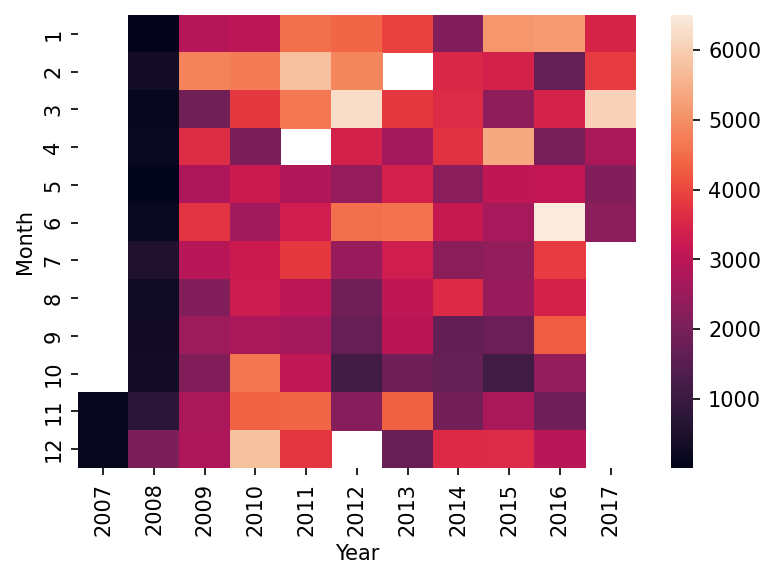

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(dpi=150)
sns.heatmap(matriz)

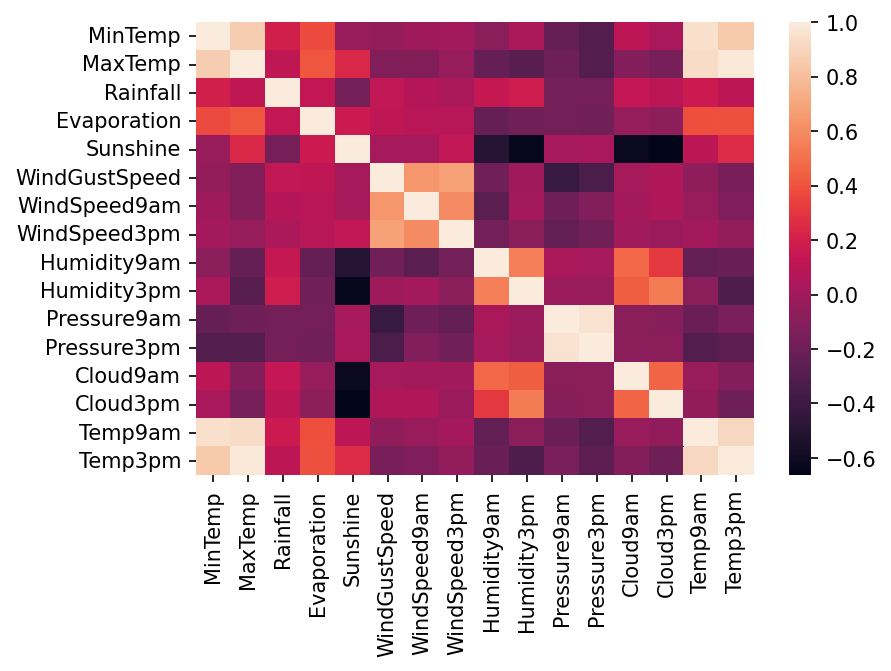

In [114]:
#No me convencen las visus probadas, busco corr.

df_corr = df.corr()
plt.figure(dpi=150)
sns.heatmap(df_corr)
#No encuentro correlaciones fuertes ni positivas ni negativas con Rainfall..


In [115]:
df_2 = df[["Date","Rainfall"]]
df_2 = df_2.sort_values("Date")
df_2['Date'] = pd.to_datetime(df_2['Date']).dt.to_period('M')
df_2['Month'] = df_2['Date'].dt.month
# df_2 = df_2.groupby(["Month"]).sum()
# df_2.reset_index(inplace=True)

df_2

,Date,Rainfall,Month
45588,2007-11,3.6,11
45589,2007-11,3.6,11
45590,2007-11,39.8,11
45591,2007-11,2.8,11
45596,2007-11,16.2,11
...,...,...,...
70391,2017-06,1.4,6
24127,2017-06,3.8,6
77988,2017-06,7.8,6
129837,2017-06,7.4,6


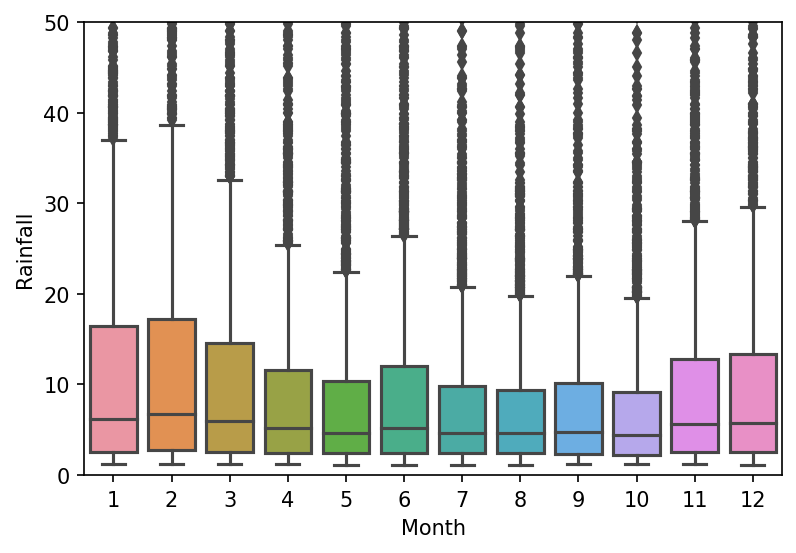

In [123]:
plt.figure(dpi=150)
plt.ylim(top=50)  # adjust the top leaving bottom unchanged
sns.boxplot(x=df_2["Month"], y=df_2["Rainfall"] )
